In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def selective_search_proposals(image_path, fast=True):
    # Load Image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create Selective Search object
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    
    # Use fast or quality mode
    if fast:
        ss.switchToSelectiveSearchFast()
    else:
        ss.switchToSelectiveSearchQuality()
    
    # Get region proposals
    rects = ss.process()
    print(f"Total proposals: {len(rects)}")
    
    # Draw top 100 proposals
    output = image.copy()
    for (x, y, w, h) in rects[:100]:
        cv2.rectangle(output, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # Show results
    plt.figure(figsize=(10, 6))
    plt.imshow(output)
    plt.axis("off")
    plt.show()
    
    return rects

Total proposals: 442


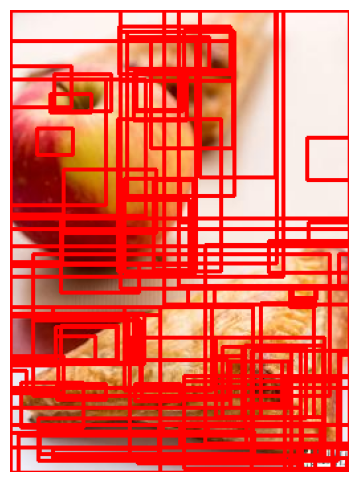

array([[  0, 231,  89,  35],
       [  0, 264,  35,   4],
       [  0,   0, 201, 191],
       ...,
       [ 17, 175, 239, 161],
       [  0, 167, 256, 182],
       [  0, 318, 219,  31]])

In [21]:
# Example usage
image_path =".\\..\\Dataset\\train_set\\train_117597.jpg"  # Replace with your image
selective_search_proposals(image_path)

In [22]:
def grabcut_segmentation(image_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Define an initial rectangle (manual bounding box around food)
    height, width = image.shape[:2]
    rect = (int(width * 0.1), int(height * 0.2), int(width * 0.8), int(height * 0.7))  # Adjust as needed
    
    # Create mask and background/foreground models
    mask = np.zeros(image.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    
    # Apply GrabCut
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    
    # Create final mask: 0,2 -> background, 1,3 -> foreground
    mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented = image * mask_final[:, :, np.newaxis]
    
    # Show results
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented)
    plt.title("Segmented Image")
    plt.show()


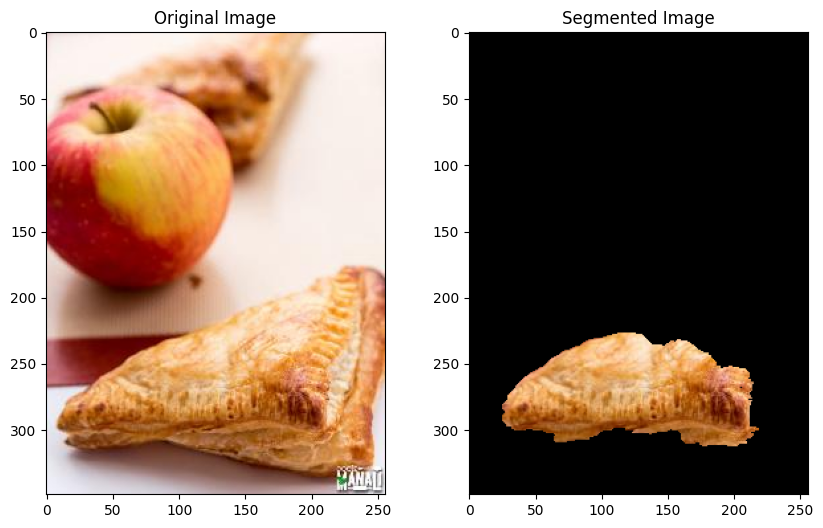

In [23]:
# Example usage
grabcut_segmentation(image_path)